In [1]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from matplotlib.gridspec import GridSpec

from udonpred_benchmarking.constants import DATA_DIR, PLOT_DIR
from udonpred_benchmarking.plots import BARPLOT_KEYWORDS, FIGURE_KEYWORDS, METHODS, set_theme

In [17]:
TEST_SET = "caid3"
#TEST_SET = "trizod"

residue_df = pl.read_csv(DATA_DIR / f"{TEST_SET}/per_residue_predictions.csv")
if TEST_SET == "caid3" and "ODiNPred" in METHODS:
    METHODS.remove("ODiNPred")
BINARY_SCORE_NAME = "pscores_binary" if TEST_SET == "trizod" else "CAID3_binary"
CONTINUOUS_SCORE_NAME = "pscores" if TEST_SET == "trizod" else "CAID3_binary"
PROTEIN_COLUMN_NAME = "ID" if TEST_SET == "trizod" else "protein"

protein_df = pl.read_csv(DATA_DIR / TEST_SET / "per_protein_performance.csv")
set_theme()
gs = GridSpec(2, 3, height_ratios=[1, .05])

/tmp/ipykernel_50433/1075984890.py:56: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(PLOT_DIR / TEST_SET / "boxplot_per_protein.png")
/home/julius/projects/University/Publications/UdonPred/Benchmarking/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


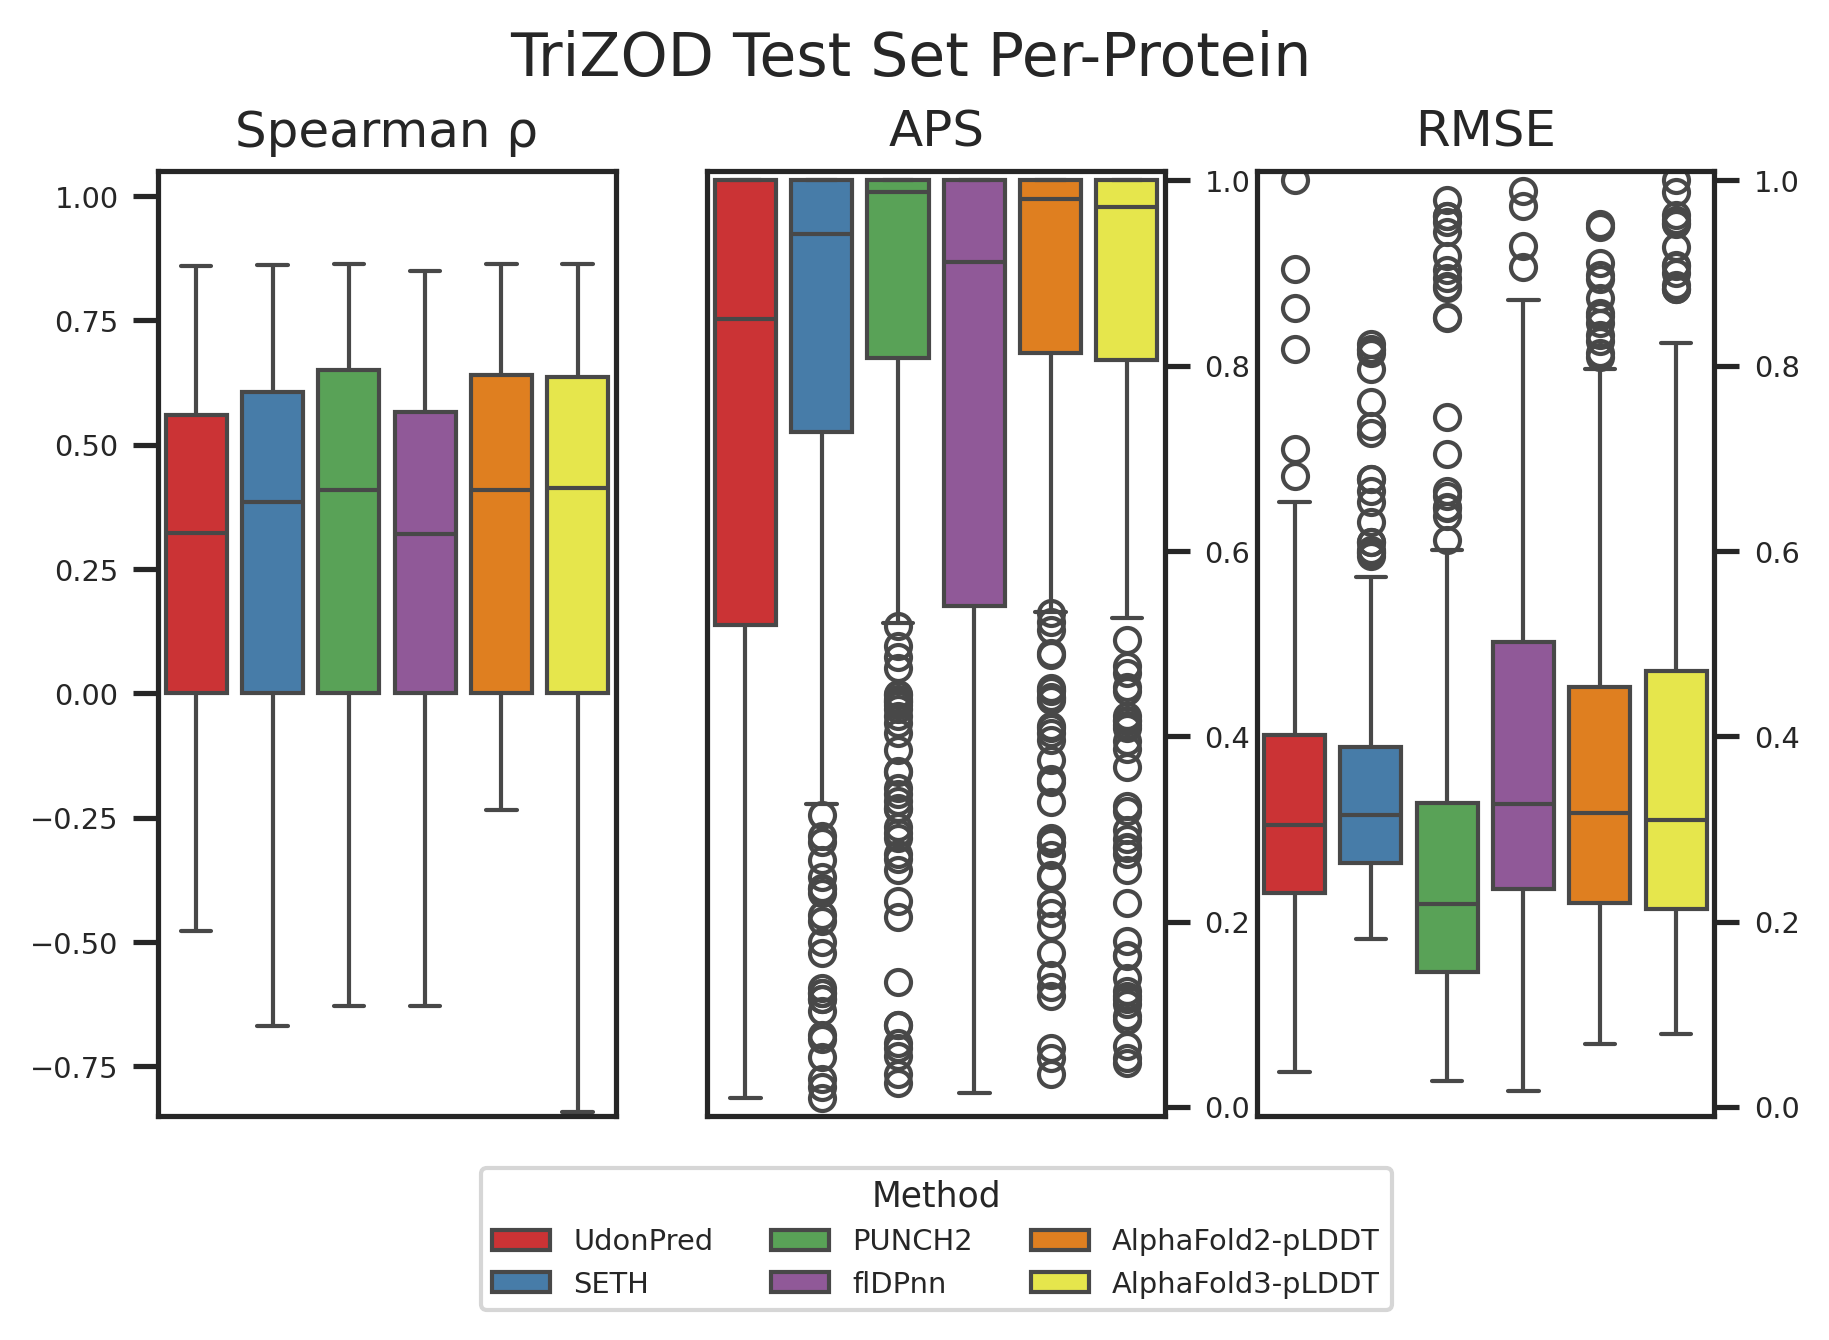

In [4]:
fig = plt.figure(**FIGURE_KEYWORDS)
ax1 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax3)
ax4 = fig.add_subplot(gs[1, :])
ax4.axis("off")

spearman_plot = sns.boxplot(
    protein_df.filter(pl.col("metric") == "spearman"),
    x="method",
    y="value",
    hue="method",
    ax=ax1,
    legend=True
)
spearman_plot.set_title("Spearman ρ")
spearman_plot.set_ylabel(None)
spearman_plot.set_ylim([-.85, 1.05])
spearman_plot.get_legend().remove()
plt.setp(spearman_plot.get_yticklabels(), fontsize="xx-small")

aps_plot = sns.boxplot(
    protein_df.filter(pl.col("metric") == "aps"),
    x="method",
    y="value",
    hue="method",
    ax=ax2,
)
ids = protein_df[PROTEIN_COLUMN_NAME].unique()
aps_plot.set_title("APS")
aps_plot.set_ylabel(None)
aps_plot.yaxis.tick_right()
plt.setp(aps_plot.get_yticklabels(), fontsize="xx-small")

rmse_plot = sns.boxplot(
    protein_df.filter(pl.col("metric") == "rmse"),
    x="method",
    y="value",
    hue="method",
    ax=ax3,
)
rmse_plot.set_title("RMSE")
rmse_plot.set_ylabel(None)
rmse_plot.set_ylim([-.01, 1.01])
rmse_plot.yaxis.tick_right()
plt.setp(rmse_plot.get_yticklabels(), fontsize="xx-small")

for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_visible(False)

# Legend
legend = ax4.legend(*ax1.get_legend_handles_labels(), loc="center", ncols=3, title="Method", fontsize="xx-small", title_fontsize="x-small")

plt.suptitle(f"{TEST_SET} Test Set Per-Protein")

plt.savefig(PLOT_DIR / TEST_SET / "boxplot_per_protein.png")

/tmp/ipykernel_50433/1785039403.py:57: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(PLOT_DIR / TEST_SET / "boxplot_per_protein_nulls_dropped.png")
/home/julius/projects/University/Publications/UdonPred/Benchmarking/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


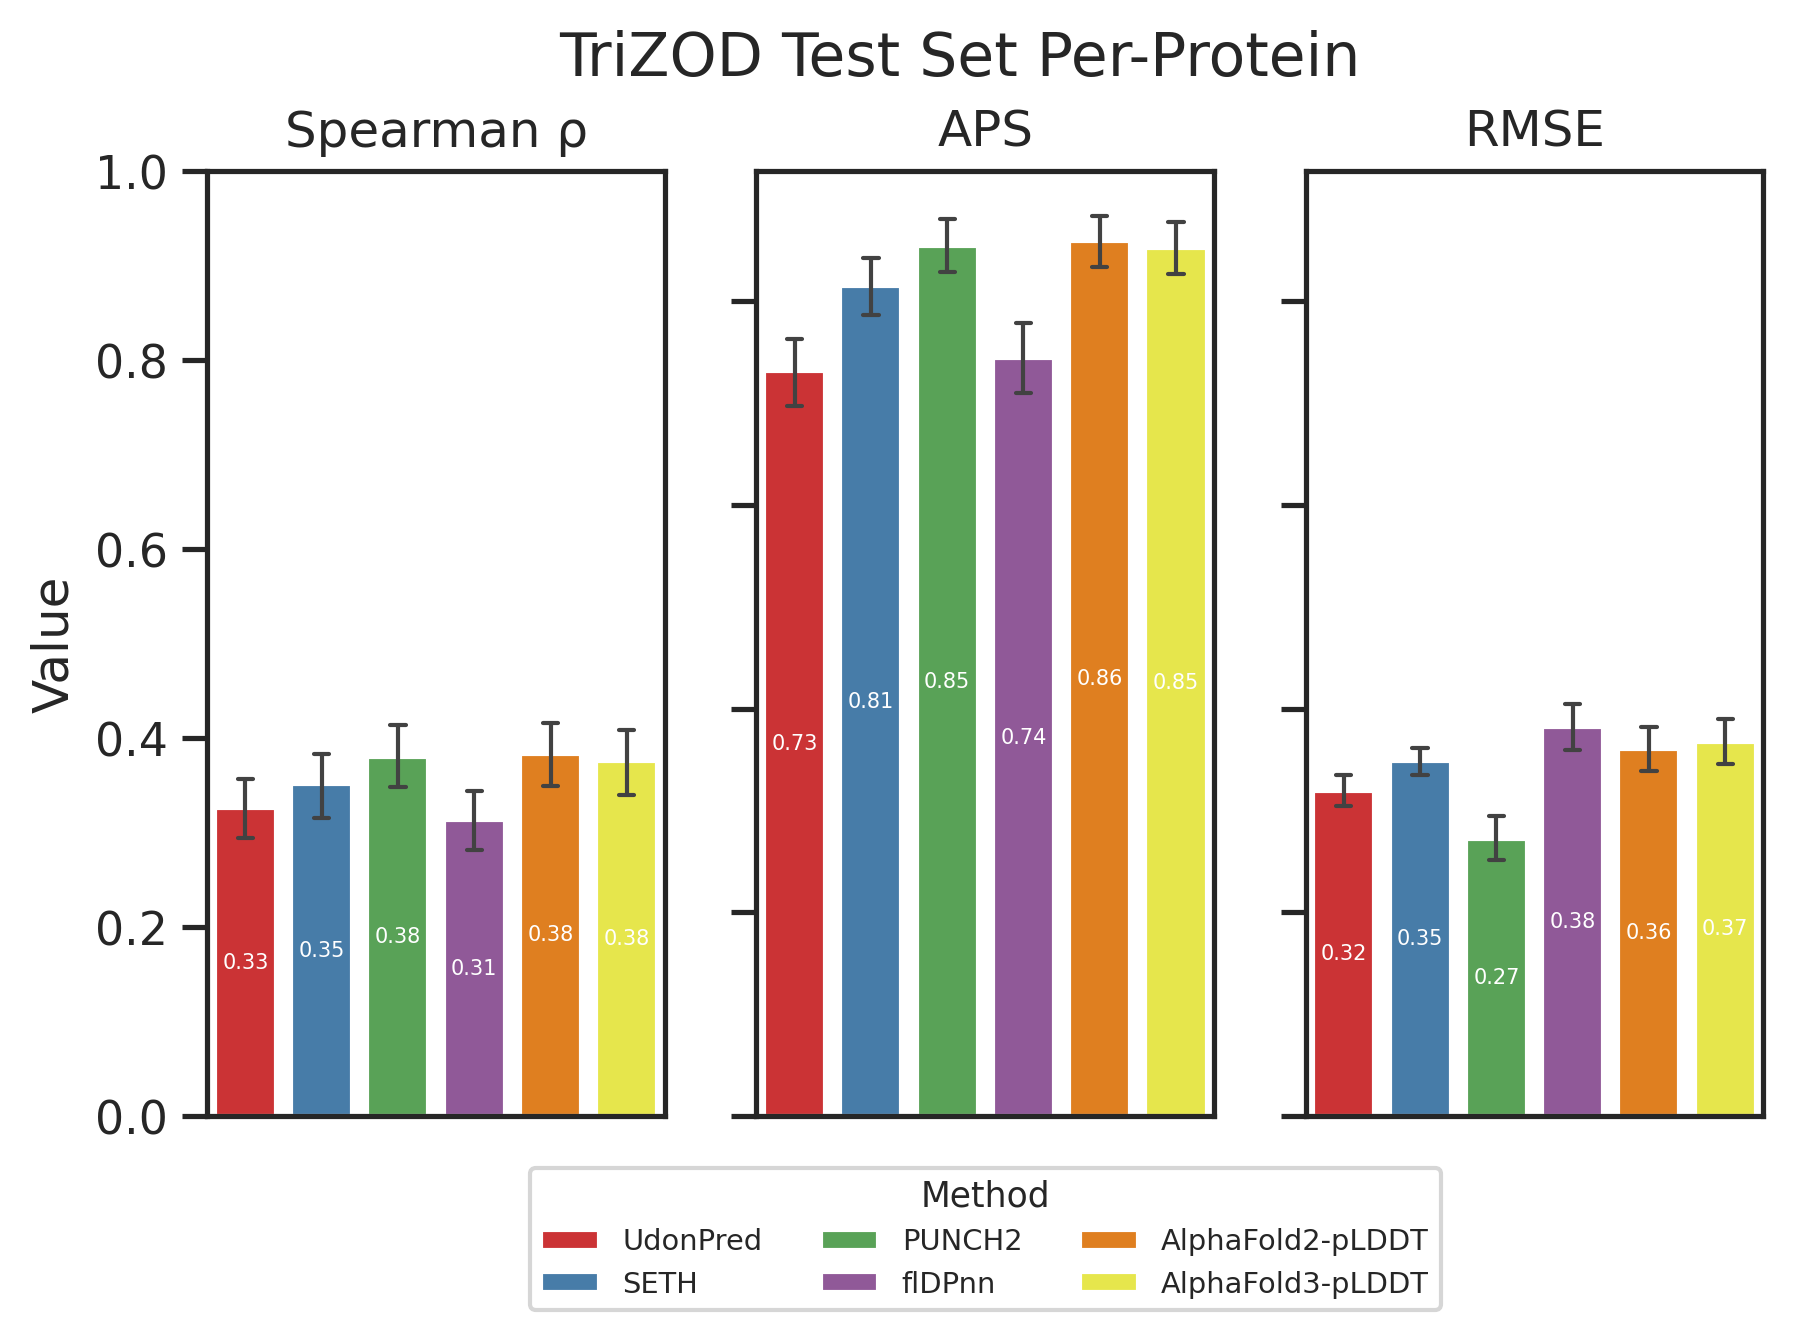

In [18]:
fig = plt.figure(**FIGURE_KEYWORDS)
ax1 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax3)
ax4 = fig.add_subplot(gs[1, :])
ax4.axis("off")

spearman_plot = sns.barplot(
    protein_df.filter(pl.col("metric") == "spearman"),
    x="method",
    y="value",
    hue="method",
    ax=ax1,
    legend=True,
    **BARPLOT_KEYWORDS
)
spearman_plot.set_title("Spearman ρ")
spearman_plot.set_ylabel("Value")
spearman_plot.set_ylim([0, 1])
spearman_plot.get_legend().remove()

aps_plot = sns.barplot(
    protein_df.filter(pl.col("metric") == "aps"),
    x="method",
    y="value",
    hue="method",
    ax=ax2,
    **BARPLOT_KEYWORDS
)
ids = protein_df[PROTEIN_COLUMN_NAME].unique()
aps_plot.set_title("APS")
aps_plot.set_ylabel(None)
plt.setp(aps_plot.get_yticklabels(), visible=False)

rmse_plot = sns.barplot(
    protein_df.filter(pl.col("metric") == "rmse"),
    x="method",
    y="value",
    hue="method",
    ax=ax3,
    **BARPLOT_KEYWORDS
)
rmse_plot.set_title("RMSE")
rmse_plot.set_ylabel(None)
plt.setp(rmse_plot.get_yticklabels(), visible=False)

for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_visible(False)
    for i in range(len(METHODS)):
        ax.bar_label(ax.containers[i], fontsize=5, fmt="%.2f", label_type="center", color="white")

# Legend
legend = ax4.legend(*ax1.get_legend_handles_labels(), loc="center", ncols=3, title="Method", fontsize="xx-small", title_fontsize="x-small")

plt.suptitle(f"{TEST_SET} Test Set Per-Protein")

plt.savefig(PLOT_DIR / TEST_SET / "boxplot_per_protein.png")